<a href="https://www.kaggle.com/arjivj/consumer-staples-sector-great-recession?scriptVersionId=86615477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Comparing the performance of stocks from the Consumer Staples sector to other sectors during The Great Recession for my Virtual Internship Project. *(Credit to [Selva](http://www.kaggle.com/selval/analysing-stock-data) for help with the code!)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

#listing out a selection of stocks from each sector 

consumer_staples = ['tgt', 'dltr', 'pg', 'wmt', 'cost', 'ko']
finance = ['jpm', 'usb', 'bac', 'gs', 'wfc']
healthcare = ['jnj', 'unh', 'pfe']

In [2]:
stocks = []

#randomly selecting stocks from our sectors 

CS = random.choice(consumer_staples)
stocks.append(CS)
F = random.choice (finance)
stocks.append(F)
H = random.choice (healthcare)
stocks.append(H)

#printing out the randomly selected stocks 
for stock in stocks:
    print(stock)

pg
bac
pfe


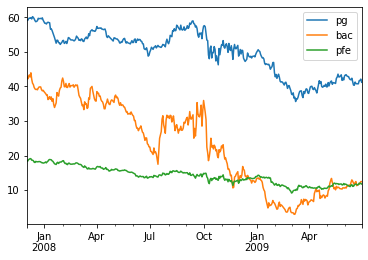

In [3]:
#restrict dates to Great Recession
dates = pd.date_range('2007-12-01','2009-06-30',freq='B')

#creating a blank dataframe
df = pd.DataFrame(index=dates)

#get stock data during the Great Recession for each of the randomly selected stocks from above and add to our empty dataframe
for stock in stocks:
        df_temp = pd.read_csv("../input/Data/Stocks/{}.us.txt".format(stock), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': stock})   
        df = df.join(df_temp)
   
#plot the dataframe with stock data. using the interpolate function here to account for missing values and to produce a smoother graph
df.interpolate().plot()
plt.show()

pg     59.13
bac    42.15
pfe    18.37
Name: 2007-12-04 00:00:00, dtype: float64


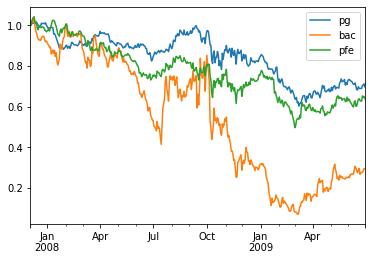

In [4]:
# normalising stocks for easier comparison with closing price on 2007-12-01 acting as the base value
print(df.iloc[1,:])
df = df / df.iloc[1,:]
df.interpolate().plot()
plt.show()

#Blue line = Consumer Staples, Orange Line = Finance, Green Line = Healthcare